## Настройка окружения

In [ ]:
%nvidia-smi

Fri Nov 15 23:35:19 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   44C    P8               9W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [2]:
import os
HOME = os.getcwd()
print(HOME)

/content


## Установка YOLO11

In [3]:
%pip install ultralytics supervision roboflow
import ultralytics
ultralytics.checks()

Ultralytics 8.3.31 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 32.2/112.6 GB disk)


## Тюнинг YOLO11 на своем датасете

In [ ]:
%pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="iFZGaJVqJ8m7sjJioKym")
project = rf.workspace("razmetka-dj4rc").project("tula")
version = project.version(1)
dataset = version.download("yolov11")

loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to tula-1 in yolov11:: 100%|██████████| 31880/31880 [00:07<00:00, 4340.87it/s]


## Обучение

In [ ]:
%cd {HOME}

%yolo task=detect mode=train model=yolo11s.pt data={dataset.location}/data.yaml epochs=10 imgsz=640 plots=True

/content
100% 18.4M/18.4M [00:00<00:00, 95.8MB/s]
Ultralytics 8.3.31 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolo11s.pt, data=/content/tula-1/data.yaml, epochs=10, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=Fa

In [ ]:
%ls {HOME}/runs/detect/train/

args.yaml					    PR_curve.png	   val_batch0_pred.jpg
confusion_matrix_normalized.png			    R_curve.png		   val_batch1_labels.jpg
confusion_matrix.png				    results.csv		   val_batch1_pred.jpg
events.out.tfevents.1731713936.09ec60b8adc6.1736.0  results.png		   val_batch2_labels.jpg
F1_curve.png					    train_batch0.jpg	   val_batch2_pred.jpg
labels_correlogram.jpg				    train_batch1.jpg	   weights
labels.jpg					    train_batch2.jpg
P_curve.png					    val_batch0_labels.jpg


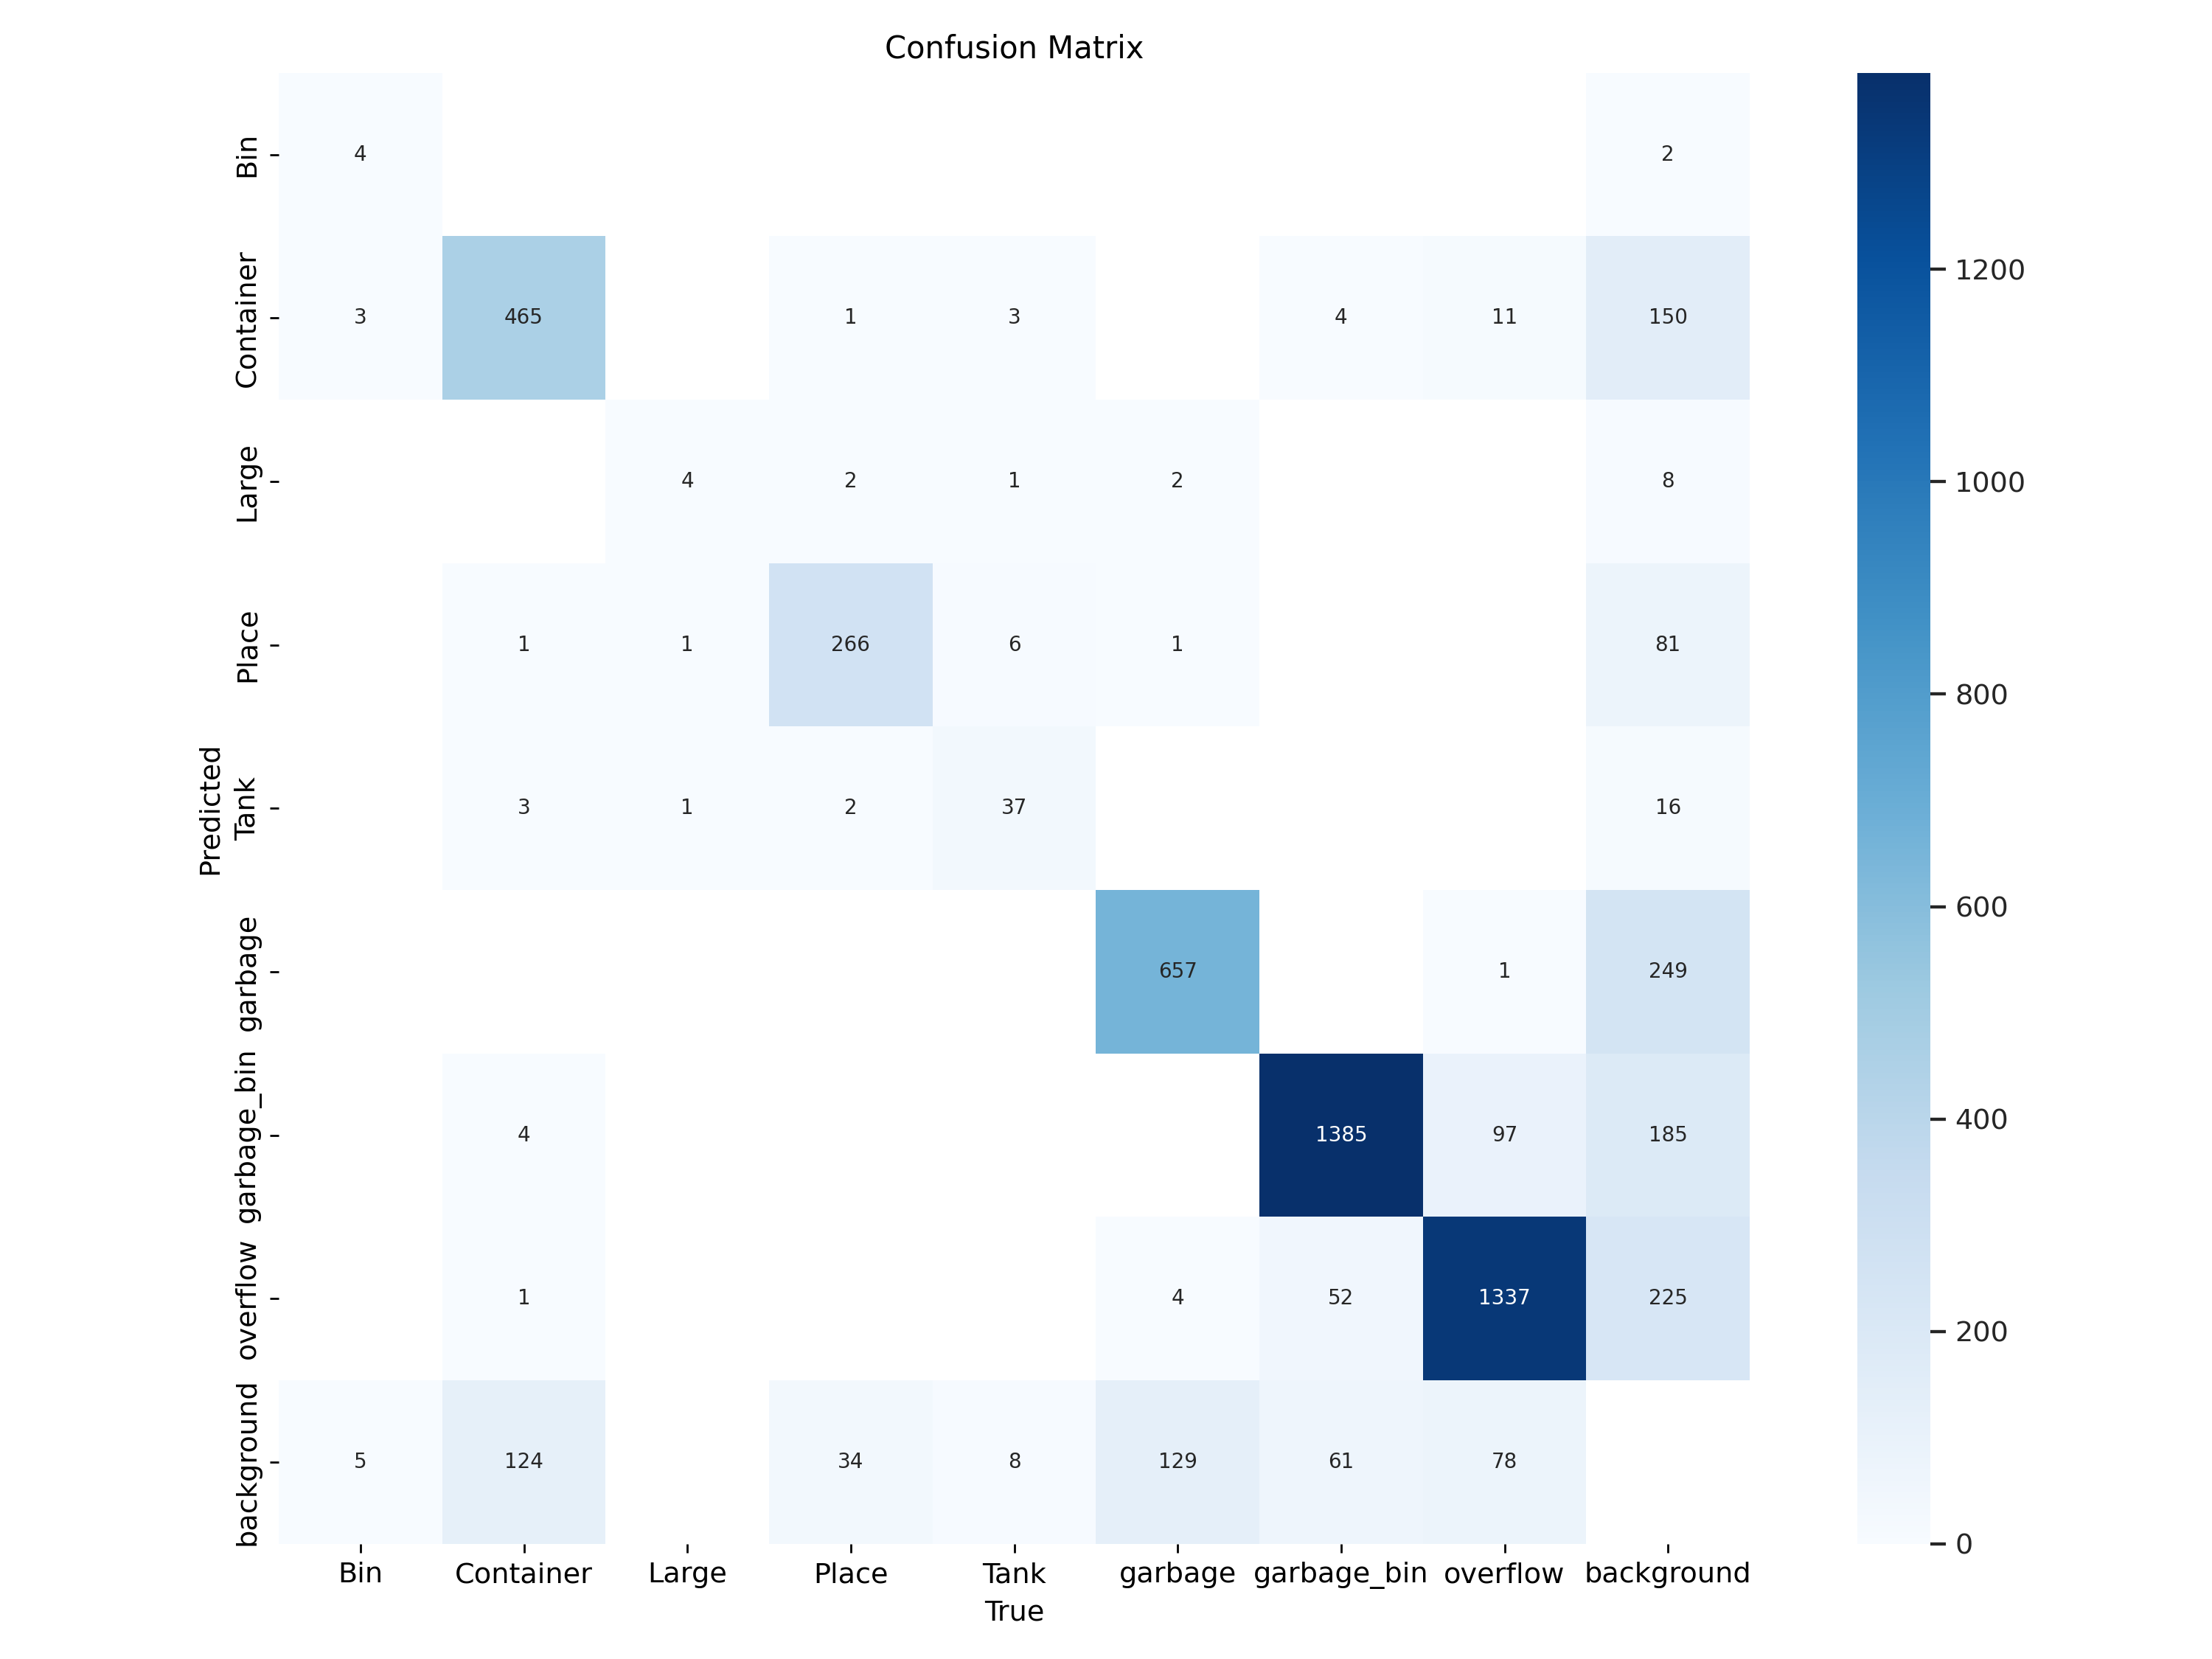

In [7]:
from IPython.display import Image as IPyImage

IPyImage(filename=f'{HOME}/runs/detect/train/confusion_matrix.png', width=600)

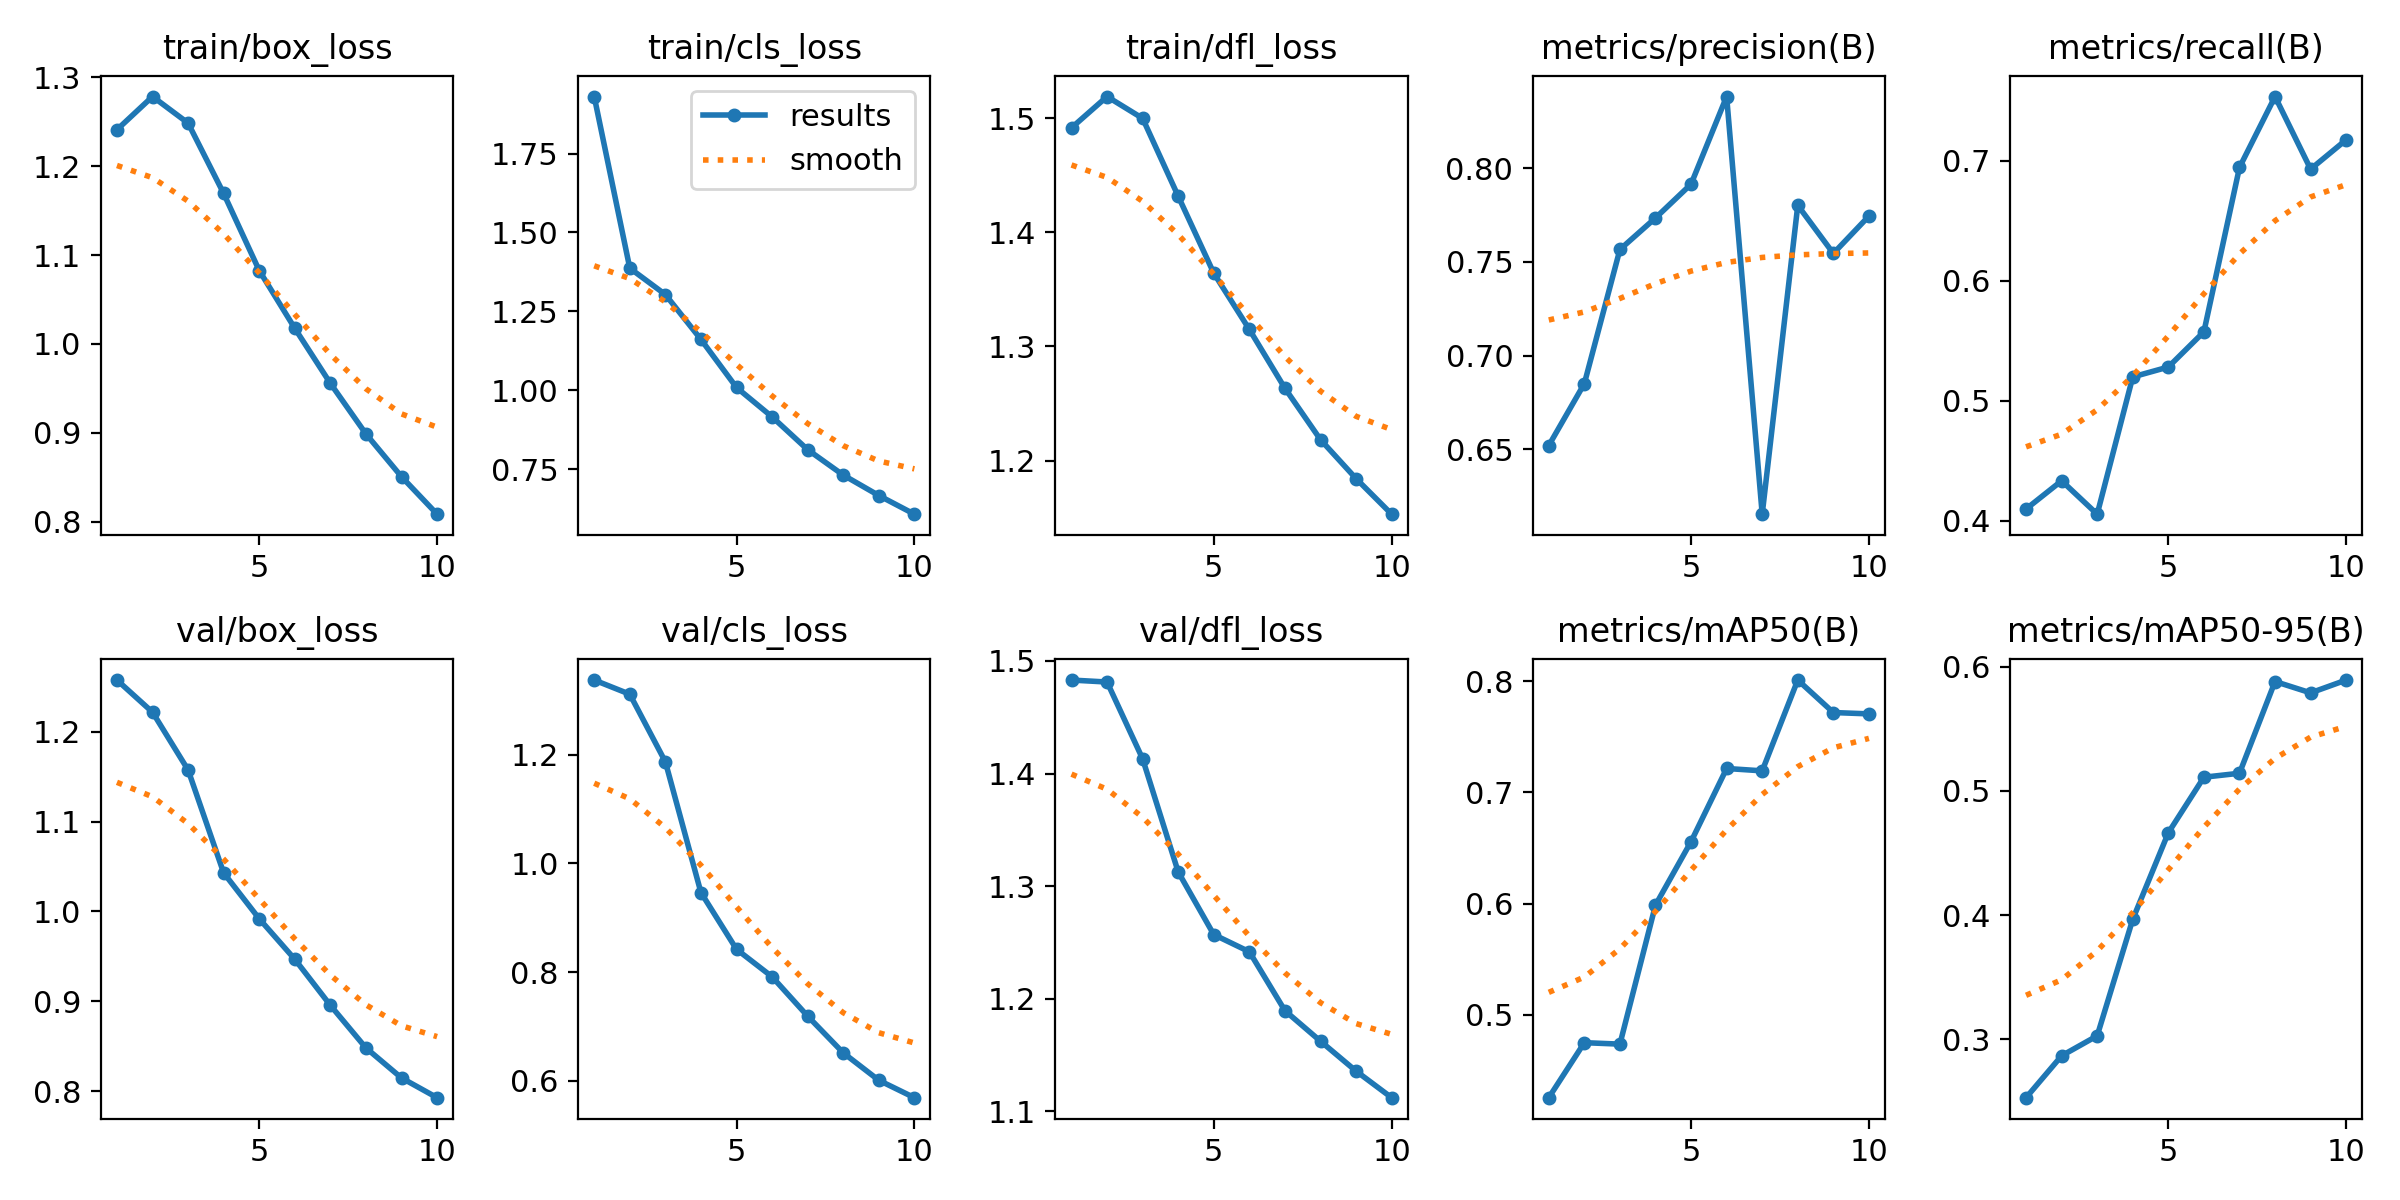

In [8]:
from IPython.display import Image as IPyImage

IPyImage(filename=f'{HOME}/runs/detect/train/results.png', width=600)

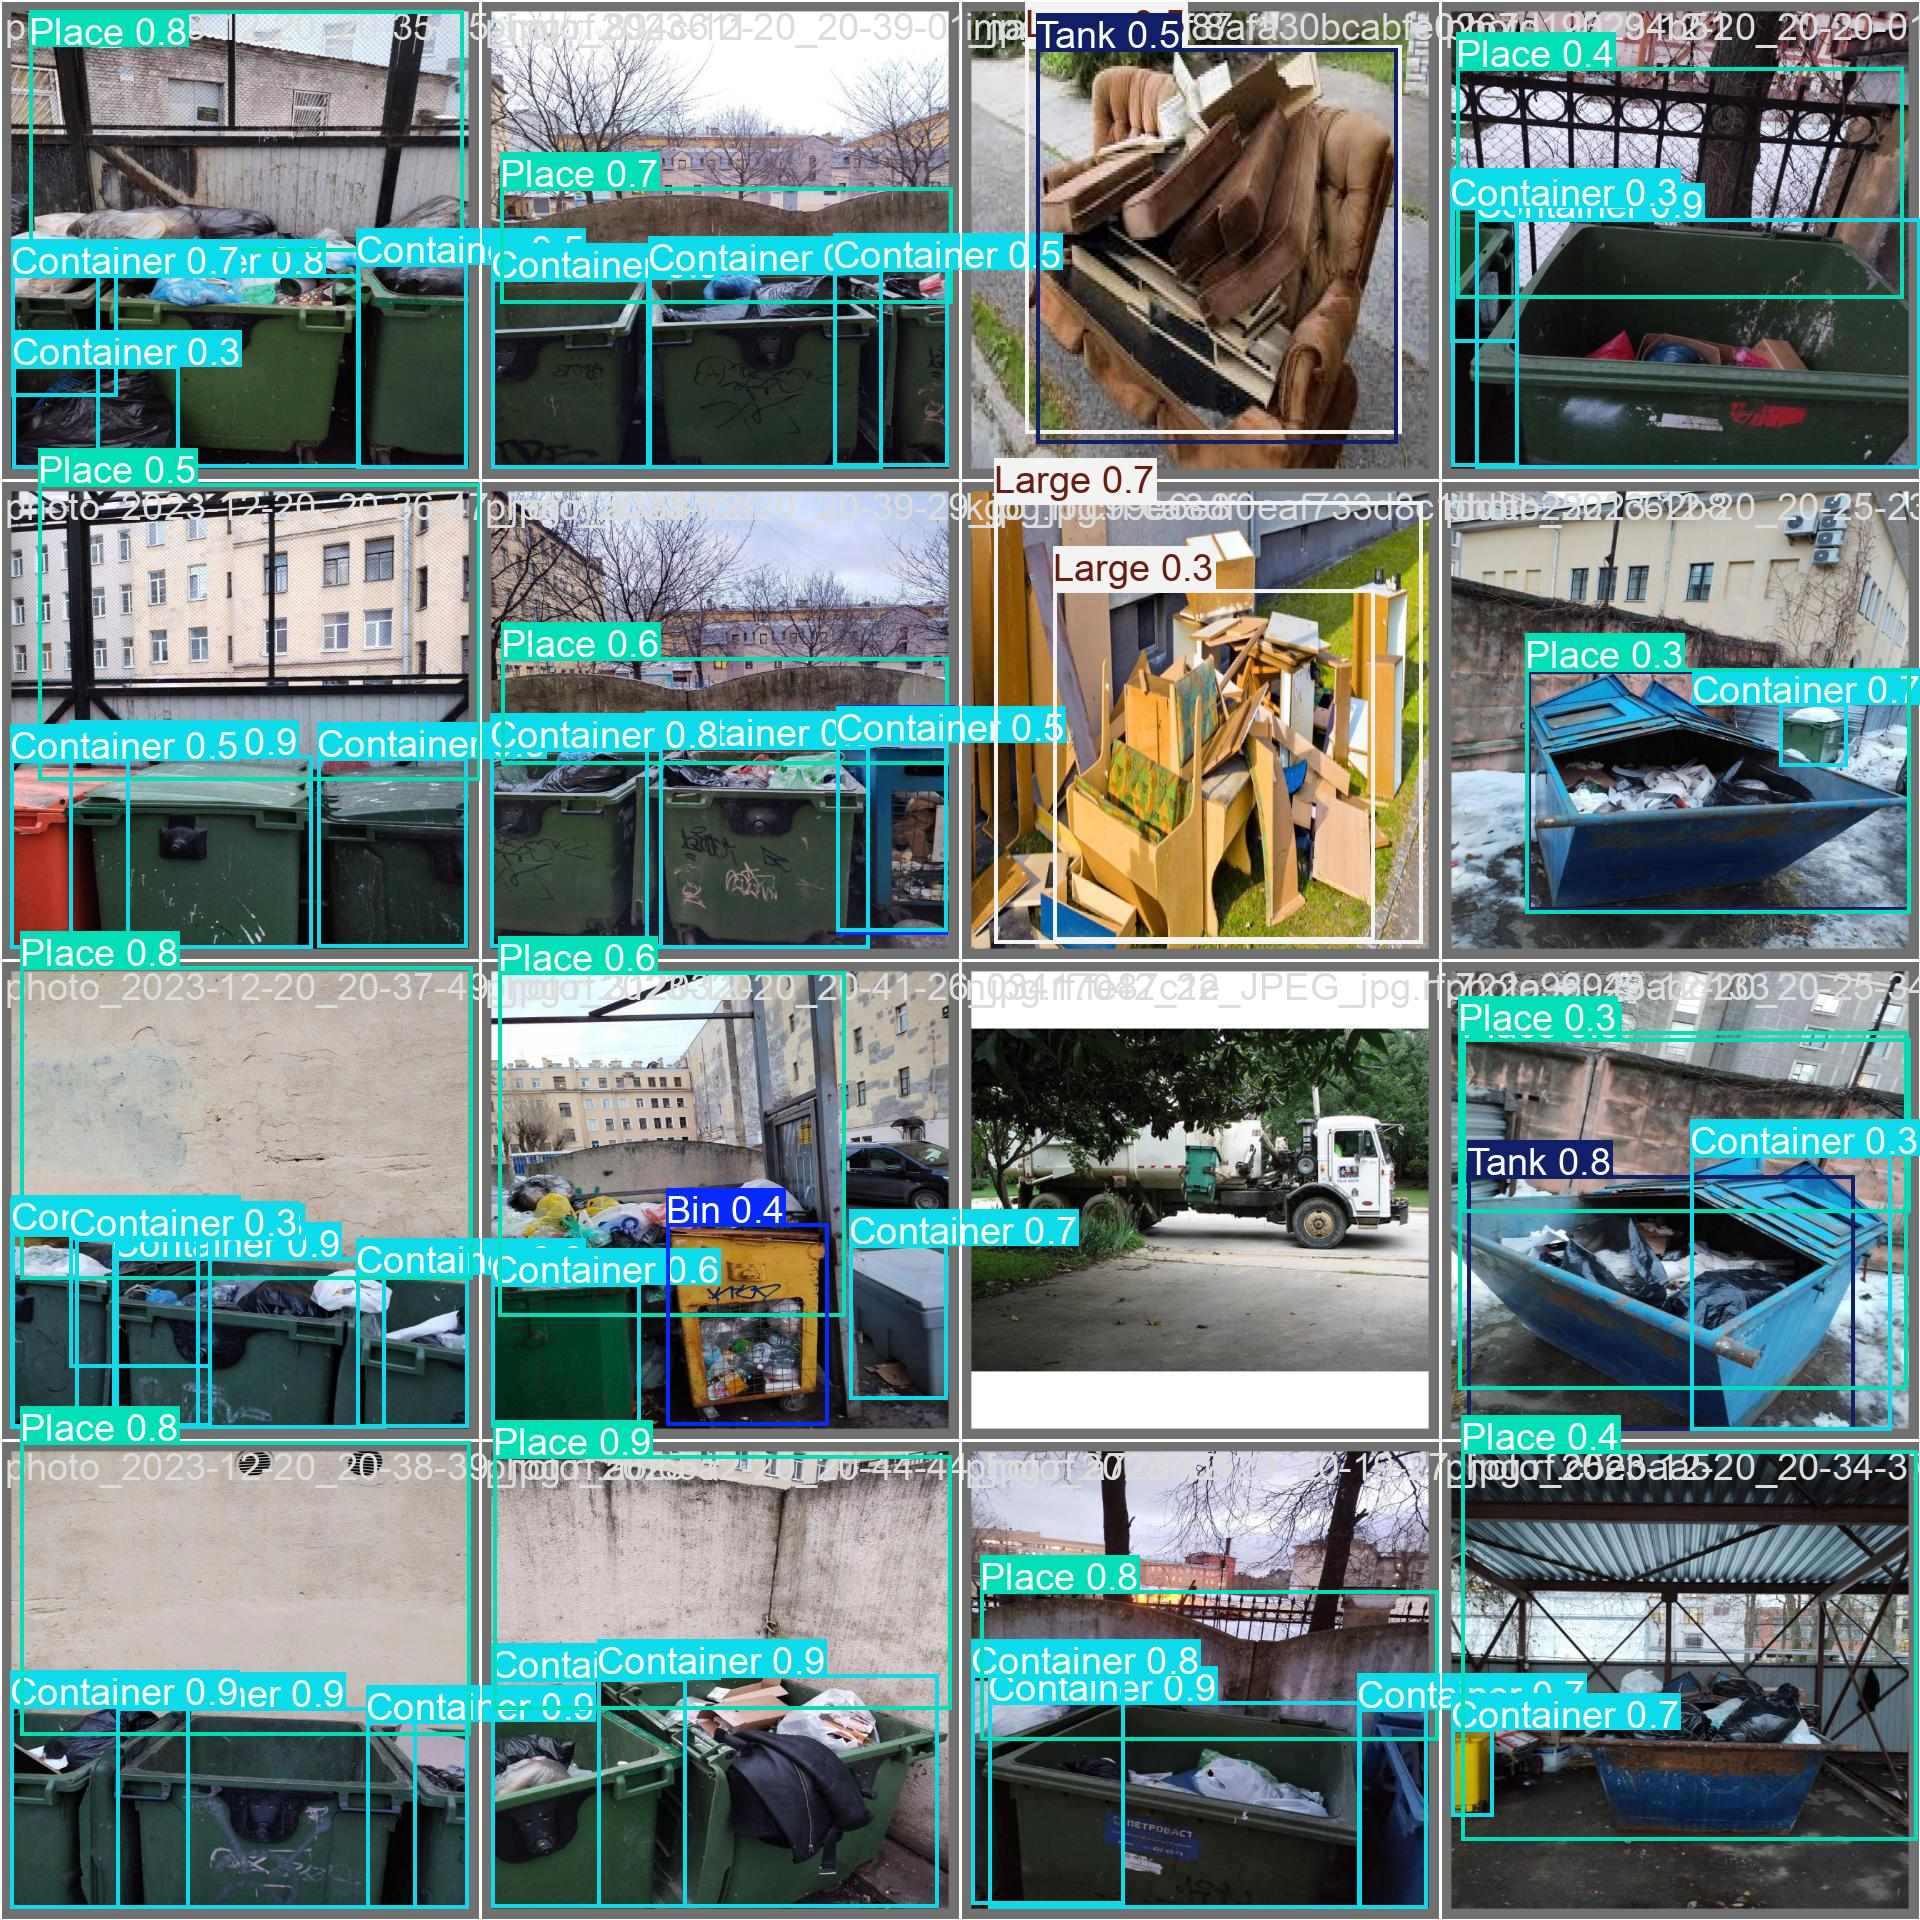

In [9]:
from IPython.display import Image as IPyImage

IPyImage(filename=f'{HOME}/runs/detect/train/val_batch0_pred.jpg', width=600)

## Валидация предобученной модели

In [ ]:
%yolo task=detect mode=val model=yolo11s.pt data={dataset.location}/data.yaml

Ultralytics 8.3.31 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLO11s summary (fused): 238 layers, 9,443,760 parameters, 0 gradients, 21.5 GFLOPs
val: Scanning /content/tula-1/valid/labels.cache... 1860 images, 0 backgrounds, 0 corrupt: 100% 1860/1860 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 117/117 [00:24<00:00,  4.73it/s]
                   all       1860       4795     0.0145      0.069     0.0094    0.00645
                person         11         12   3.31e-05     0.0833   2.16e-05   1.74e-05
               bicycle        225        598    0.00229     0.0234    0.00118   0.000466
                   car          6          6          0          0          0          0
            motorcycle        303        305   0.000715     0.0131   0.000363   0.000217
              airplane         53         55     0.0285      0.127     0.0206     0.0187
                   bus        636        793    0

## Валидация fine-tuned модели

In [ ]:
%yolo task=detect mode=val model={HOME}/runs/detect/train/weights/best.pt data={dataset.location}/data.yaml

Ultralytics 8.3.31 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLO11s summary (fused): 238 layers, 9,415,896 parameters, 0 gradients, 21.3 GFLOPs
val: Scanning /content/tula-1/valid/labels.cache... 1860 images, 0 backgrounds, 0 corrupt: 100% 1860/1860 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 117/117 [00:25<00:00,  4.50it/s]
                   all       1860       4795       0.78      0.753      0.801      0.588
                   Bin         11         12      0.809      0.357      0.517      0.435
             Container        225        598      0.788      0.758      0.811      0.574
                 Large          6          6      0.538      0.833      0.671      0.377
                 Place        303        305      0.791      0.839      0.863       0.58
                  Tank         53         55      0.761      0.673      0.791      0.579
               garbage        636        793     

## Измерение инференса моделей

In [ ]:
%yolo task=detect mode=predict model=yolo11s.pt conf=0.25 source={dataset.location}/test/images

Ultralytics 8.3.31 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLO11s summary (fused): 238 layers, 9,443,760 parameters, 0 gradients, 21.5 GFLOPs

image 1/924 /content/tula-1/test/images/000021_jpg.rf.138daf3ee88b937e8745ed41915b461e.jpg: 640x640 (no detections), 15.9ms
image 2/924 /content/tula-1/test/images/000026_jpg.rf.d69779e9d7c1d6654171a71bc991932e.jpg: 640x640 1 person, 3 cars, 15.8ms
image 3/924 /content/tula-1/test/images/000044_jpg.rf.4c4d4503c62c0809786daa58c5dc6153.jpg: 640x640 (no detections), 15.9ms
image 4/924 /content/tula-1/test/images/000050_jpg.rf.3241dd7990bd78f8bbfdbac49c9f5901.jpg: 640x640 1 car, 15.8ms
image 5/924 /content/tula-1/test/images/000055_jpg.rf.cfa88497b47026aba4bb0e3e12a4f4ec.jpg: 640x640 1 suitcase, 15.8ms
image 6/924 /content/tula-1/test/images/000057_jpg.rf.89015dfd63dbd821e19f119b0a9a0464.jpg: 640x640 1 person, 15.8ms
image 7/924 /content/tula-1/test/images/000059_jpg.rf.de2f84837f64718426e60746ac0ef43c.jpg: 640x640 (no detect

In [ ]:
%yolo task=detect mode=predict model={HOME}/runs/detect/train/weights/best.pt conf=0.25 source={dataset.location}/test/images save=True

Ultralytics 8.3.31 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLO11s summary (fused): 238 layers, 9,415,896 parameters, 0 gradients, 21.3 GFLOPs

image 1/924 /content/tula-1/test/images/000021_jpg.rf.138daf3ee88b937e8745ed41915b461e.jpg: 640x640 1 garbage, 2 overflows, 15.6ms
image 2/924 /content/tula-1/test/images/000026_jpg.rf.d69779e9d7c1d6654171a71bc991932e.jpg: 640x640 2 garbages, 1 overflow, 15.6ms
image 3/924 /content/tula-1/test/images/000044_jpg.rf.4c4d4503c62c0809786daa58c5dc6153.jpg: 640x640 2 overflows, 15.6ms
image 4/924 /content/tula-1/test/images/000050_jpg.rf.3241dd7990bd78f8bbfdbac49c9f5901.jpg: 640x640 1 garbage, 2 overflows, 15.6ms
image 5/924 /content/tula-1/test/images/000055_jpg.rf.cfa88497b47026aba4bb0e3e12a4f4ec.jpg: 640x640 2 garbage_bins, 5 overflows, 15.6ms
image 6/924 /content/tula-1/test/images/000057_jpg.rf.89015dfd63dbd821e19f119b0a9a0464.jpg: 640x640 1 garbage, 1 garbage_bin, 1 overflow, 15.6ms
image 7/924 /content/tula-1/test/images

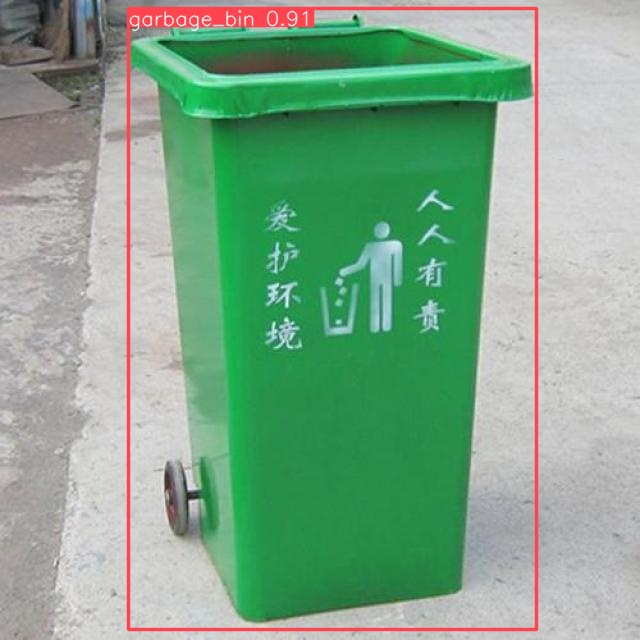

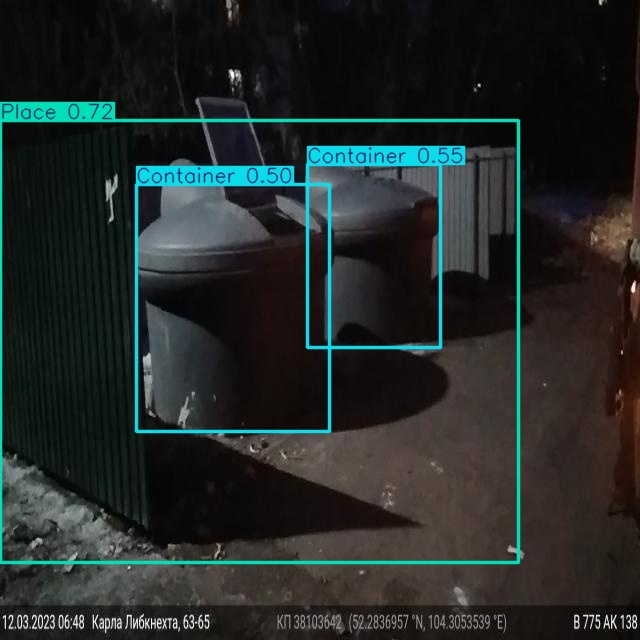

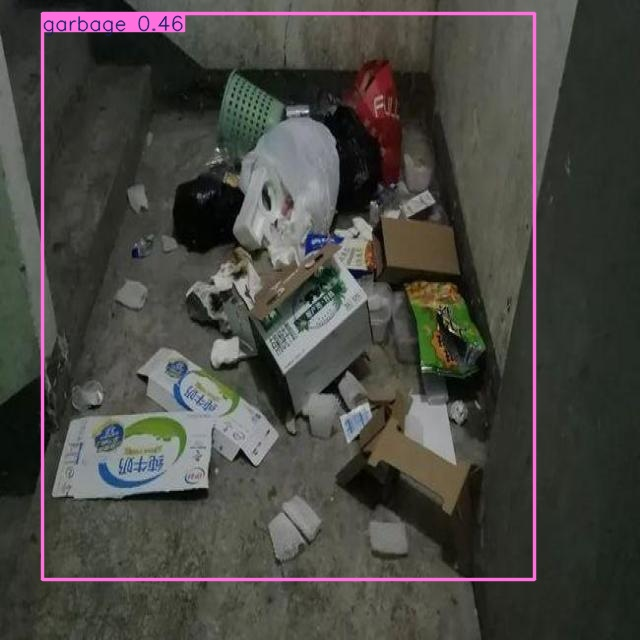

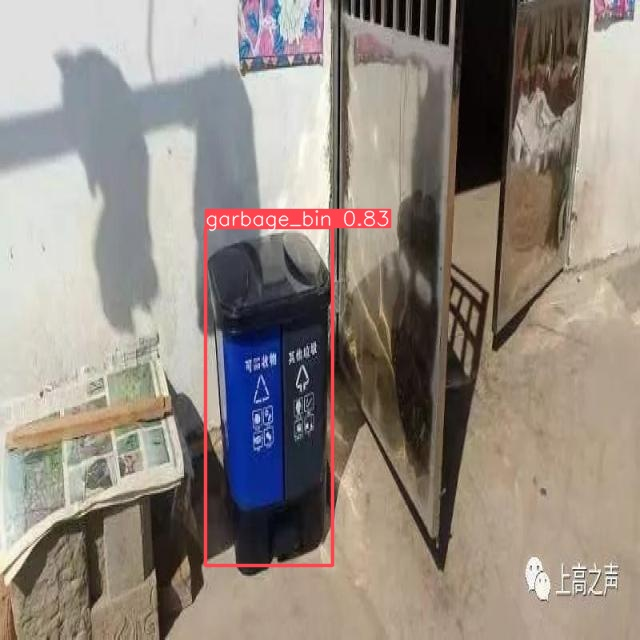

In [17]:
import glob
import os
from IPython.display import Image as IPyImage, display

latest_folder = max(glob.glob('/content/runs/detect/predict2/'), key=os.path.getmtime)
for img in glob.glob(f'{latest_folder}/*.jpg')[:4]:
    display(IPyImage(filename=img, width=600))
    print("\n")

## Экспорт модели

In [16]:
from ultralytics import YOLO
model = YOLO("/content/runs/detect/train/weights/best.pt")
model.export(format="onnx")

Ultralytics 8.3.31 🚀 Python-3.10.12 torch-2.5.1+cu121 CPU (Intel Xeon 2.00GHz)
YOLO11s summary (fused): 238 layers, 9,415,896 parameters, 0 gradients, 21.3 GFLOPs

PyTorch: starting from '/content/runs/detect/train/weights/best.pt' with input shape (1, 3, 640, 640) BCHW and output shape(s) (1, 12, 8400) (18.3 MB)
requirements: Ultralytics requirements ['onnx>=1.12.0', 'onnxslim', 'onnxruntime-gpu'] not found, attempting AutoUpdate...
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.0/16.0 MB 246.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 141.8/141.8 kB 294.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 291.5/291.5 MB 242.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.0/46.0 kB 247.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.8/86.8 kB 273.6 MB/s eta 0:00:00

requirements: AutoUpdate success ✅ 19.8s, installed 3 packages: ['onnx>=1.12.0', 'onnxslim', 'onnxruntime-gpu']
requirements: ⚠️ Restart runtime or rerun com

'/content/runs/detect/train/weights/best.onnx'